# Project - Predict the  amount of product purchase using  Multiple  Linear Regression

#   

## Importing the necessary packages and modules
* <b>numpy</b> package can be used to perform mathematical operations like 'mean'.
* <b>pandas</b> package can be used to process dataframes.
* <b>seaborn</b> package can be used to visualise data in the form of various effective graphs and plots.
* <b>sklearn</b> is the main package which is used for machine learning.
* <b>LabelEncoder</b> is used to encode the non-numeric data into numericals so that machine learning model can be built.
* <b>train_test_split</b> module is used to split the data into training and testing sets.
* <b>LinearRegression</b> module is used to fit a LinearRegression model.
* <b>sklearn.metrics</b> can be used to calculate statistical results like mean squared error, root mean squared error, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as seb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
%matplotlib inline

## Reading the dataset
* The <b>dataset</b> needs to be imported and read - we use <b>pandas</b> to acheive this.

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Processing the dataset
* After the data has been imported, we have to <b>clean/preprocess</b> the data to actually fit into a <b>regression model</b>

#### 1. Checking for missing entries

In [3]:
train_data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### 2. Filling the missing entries with 0 and checking for null entries

In [4]:
train_data = train_data.apply(lambda x : x.fillna(0))
train_data.isnull().sum()  # checking for null/missing values again

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

#### 3. Encoding the data set so as to make it easy for building machine learning model
* The original data has <b>non-numerical</b> entries for few columns
* We encode these non-numerical entries using <b>LabelEncoder</b>

In [5]:
label_enc = LabelEncoder()
data_enc = train_data

# encoding few string-contained columns
data_enc.Product_ID = label_enc.fit_transform(train_data.Product_ID)
data_enc.Gender = label_enc.fit_transform(train_data.Gender)
data_enc.Age = label_enc.fit_transform(train_data.Age)
data_enc.City_Category = label_enc.fit_transform(train_data.City_Category)
data_enc.Stay_In_Current_City_Years = label_enc.fit_transform(train_data.Stay_In_Current_City_Years)

data_enc.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,672,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,2376,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,852,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,828,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,2734,1,6,16,2,4,0,8,0.0,0.0,7969


## Declaring input and output variables
* <b>Input</b> variables are considered as all the columns except the <b>Purchase</b> column
* <b>Output</b> variables are considered as the last column, i.e, the <b>Purchase</b> column

In [6]:
x = train_data.loc[:,train_data.columns != 'Purchase']
y = train_data.iloc[:,-1]

## Splitting the data into train and test sets
* <b>Input</b> train and test sets are 2 dimensional
* <b>Output</b> train and test sets are 1 dimensional

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(440054, 11)
(110014, 11)
(440054,)
(110014,)


## Fitting the data into Linear Regression model

In [8]:
linear_reg = LinearRegression()
linear_reg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Predicting the output test values for input test values

In [9]:
ypred = linear_reg.predict(xtest)
ypred

array([10741.16298206,  5791.31736979, 11149.87283801, ...,
       12908.24134475, 11902.60637373, 10342.56906881])

## Comparing the actual output test values with the predicted output test values
* returning <b>boolean</b> values while comparing the output test values with predicted output test values

In [10]:
ypred == ytest

41001     False
16151     False
507262    False
368698    False
353782    False
358687    False
301389    False
278980    False
47994     False
416377    False
266930    False
226794    False
525409    False
490544    False
139180    False
351374    False
194821    False
346419    False
360095    False
249040    False
347094    False
1398      False
148746    False
84873     False
147779    False
103865    False
470708    False
527931    False
435287    False
269847    False
          ...  
263941    False
271136    False
348867    False
219097    False
380213    False
187312    False
352136    False
323647    False
527436    False
333542    False
347436    False
166886    False
54012     False
521367    False
179177    False
361450    False
487327    False
451747    False
112244    False
175476    False
306466    False
532628    False
145199    False
232542    False
317652    False
168473    False
246358    False
105766    False
40384     False
181039    False
Name: Purchase, Length: 

## Generating report
Report can contain:
* Variance Score (1 is the perfect prediction)
* Coefficients
* Difference of the Means of <b>output test values</b> and <b>predicted output test values</b>
* Mean error
* Root Mean Square score
* plots

### 1. Statistical results

In [11]:
difference = np.mean(ytest) - np.mean(ypred)
error = (np.mean(ytest) - np.mean(ypred))/np.mean(ytest)

print('Predicted Mean : %.2f' % np.mean(ypred), end = '\n\n')
print('Actual Mean : %.2f' % np.mean(ytest), end = '\n\n')
print('Difference : %.2f' % difference, end = '\n\n')
print('Coefficients :')
print(linear_reg.coef_, end = '\n\n')
print('Variance score: %.4f' % linear_reg.score(xtest, ytest), end = '\n\n')  
print('Mean Error : %.4f' %  error, end = '\n\n')
print('Percentage Error : %.4f' % (error*100), end = '\n\n')
print('Root Mean Square score : %.4f' % r2_score(ytest, ypred))

Predicted Mean : 9261.13

Actual Mean : 9269.14

Difference : 8.00

Coefficients :
[ 1.01660189e-02 -3.20793192e-01  4.98621317e+02  1.07305884e+02
  6.01314493e+00  3.21664429e+02  1.09243035e+01 -5.50588693e+01
 -3.46698147e+02  8.80730925e+00  1.37275651e+02]

Variance score: 0.1566

Mean Error : 0.0009

Percentage Error : 0.0863

Root Mean Square score : 0.1566


### 2. Visualising the data for the actual values vs. the predicted values

#### 1. Creating a dataframe with y_pred and y_test columns

In [12]:
df = pd.DataFrame({'y_pred' : tuple(ypred), 'y_test' : tuple(ytest)})

#### 2. Plotting - joint plot

In [13]:
seb.set(style = "darkgrid")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


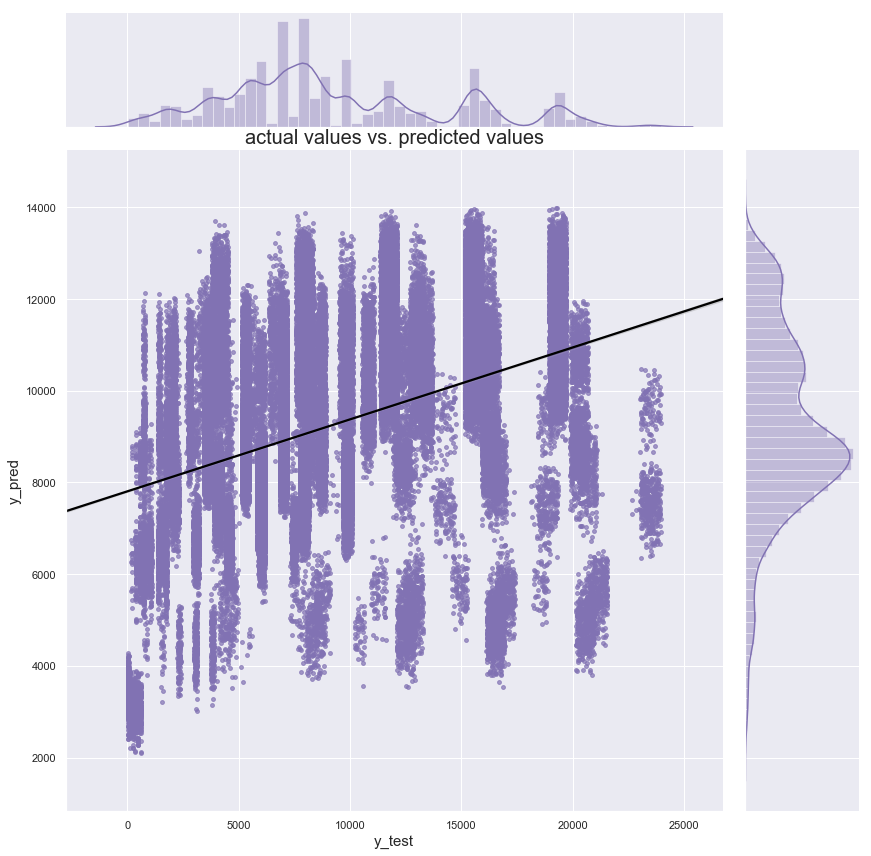

In [14]:
g = seb.jointplot('y_test', 'y_pred', data = df, kind = 'reg', 
                  joint_kws = {'line_kws':{'color':'black'}}, scatter_kws={'s' : 15, 'alpha':0.7}, color = 'm', height = 12)
g.set_axis_labels('y_test', 'y_pred', fontsize = 15)
plt.title('actual values vs. predicted values', fontsize = 20)
plt.show()

#### 3. Plotting - Pairplot

1. setting the color palette

In [15]:
seb.set_palette('Purples', 1)

2. plotting

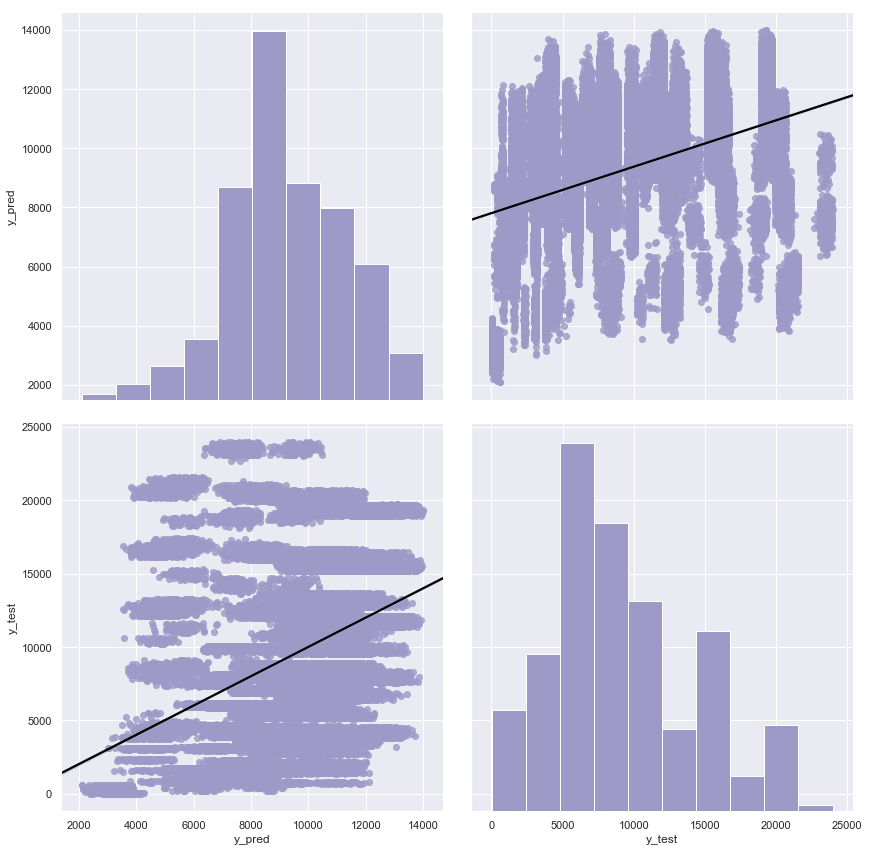

In [16]:
seb.pairplot(df, kind = 'reg', plot_kws = {'line_kws':{'color':'black'}}, height = 6)
plt.show()